In [8]:
# t검정 : (귀무가설 : 과자의 무게는 50g이다.)
import pandas as pd
junk_food = pd.read_csv('dataset/5_8_jfw.csv')
jfood = junk_food.weight

In [9]:
# 표본평균
import numpy as np
mu = np.mean(jfood)
mu

55.38496619666667

In [11]:
# 자유도
df = len(jfood)-1
df

19

In [13]:
# 표준오차
sigma = np.std(jfood,ddof=1)
se = sigma / np.sqrt(len(jfood))
se

1.9579276805755885

In [14]:
t_value = (mu - 50) / se
t_value

2.7503396831713434

In [17]:
from scipy import stats
# p값(유의확률)이 유의수준 0.05보다 작으면 귀무가설 기각
alpha = stats.t.cdf(t_value, df=df)
(1 - alpha) * 2

0.012725590012524046

In [20]:
# t검정 : t값, p값
# p값(유의확률)이 유의수준 0.05보다 작으므로 귀무가설 기각
# '과자의 무게는 50g이 아니다'라고 할 수 있다.
stats.ttest_1samp(jfood,50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

### 대응표본 t검정 : 약을 먹기 전과 후의 체온의 차이를 보는 경우 사용
### 독립표본 t검정 : 큰 바늘로 낚은 물고기의 길이와 작은 바늘로 낚은 물고기의 길이 차이를 보는 경우 사용 
### (welch 근사법이라고 불리는 방법을 이용하여  p값을 계산)

- 카이제곱 겁정(chi-squared test)또는 X2 검정은 카이제곱 분포에 기초한 통계적 방법으로, 관찰된 빈도가 기대 빈도와 통계적으로 다른지를 판단하는 검증방법임.
- 카이제곱 검정에는 독립성 검정, 동질성 검정 등이 있음.
- 독립성 검정과 동질성 검정은 분할표와 가설 설정 부분만 다르며 검정 수행방법은 동일한 과정으로 진행됨.
- 독립성 검정은 하나의 모집단에서 표본추출하며 동질성 검정은 두 개 이상의 모집단에서 표본 추출하여 분할표를 만듦.
- [독립성 검정 사례] 어느 병원에서 진료를 받은 환자의 나이와 진찰받은 부위를 구분하여 작성한 분할표이다. 나이와 진찰받은 부위가 서로 관계가 있는지 유의수준 5%에서 검정.
- [동질성 검정 사례] 세 가지 토양의 종류(진흙,모래,로움)에 따른 새로운 잡종 식물의 성장상태를 알기 위해 진흙 65군데, 모래 60군데, 로움 60군데를 대상으로 실험을 행하여 다음과 같은 분할표를 작성하였다. 토양의 종류에 따라 식물의 성장상태가 다르다고 할 수 있는 지를 유의수준 5%에서 검정

In [22]:
pt_data = pd.read_csv('dataset/5_9_ptt.csv')
pt_data.head()

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1


In [26]:
# 대응표본 t검정
before = pt_data.query('medicine == "before"')['body_temperature']
after = pt_data.query('medicine == "after"')['body_temperature']
# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after - before
diff

0.759999999999998

In [27]:
# 평균값이 0과 다른지 검정
# 귀무가설을 기각하므로 유의미한 차이가 있다고 주장할 수 있다.
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [31]:
# 독립표본 t검정
# 평균치
mean_bf = np.mean(before)
mean_af = np.mean(after)
# 분산
sigma_bf = np.var(before,ddof=1)
sigma_af = np.var(after,ddof=1)
# 샘플사이즈
m = len(before)
n = len(after)

# t값
t_value = (mean_af-mean_bf) / np.sqrt((sigma_bf / m) + (sigma_af / n))
t_value

3.1557282344421034

In [32]:
# 귀무가설을 기각하고 유의미한 차이가 있다고 결론
# equal_var = False : 분산이 다르다고 가정한 t검정(welch검정)
stats.ttest_ind(after,before,equal_var=False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

- 카이제곱 겁정(chi-squared test)또는 X2 검정은 카이제곱 분포에 기초한 통계적 방법으로, 관찰된 빈도가 기대 빈도와 통계적으로 다른지를 판단하는 검증방법임.
- 카이제곱 검정에는 독립성 검정, 동질성 검정 등이 있음.
- 독립성 검정과 동질성 검정은 분할표와 가설 설정 부분만 다르며 검정 수행방법은 동일한 과정으로 진행됨.
- 독립성 검정은 하나의 모집단에서 표본추출하며 동질성 검정은 두 개 이상의 모집단에서 표본 추출하여 분할표를 만듦.
- [독립성 검정 사례] 어느 병원에서 진료를 받은 환자의 나이와 진찰받은 부위를 구분하여 작성한 분할표이다. 나이와 진찰받은 부위가 서로 관계가 있는지 유의수준 5%에서 검정.
- [동질성 검정 사례] 세 가지 토양의 종류(진흙,모래,로움)에 따른 새로운 잡종 식물의 성장상태를 알기 위해 진흙 65군데, 모래 60군데, 로움 60군데를 대상으로 실험을 행하여 다음과 같은 분할표를 작성하였다. 토양의 종류에 따라 식물의 성장상태가 다르다고 할 수 있는 지를 유의수준 5%에서 검정

In [35]:
# 카이제곱 검정 : 독립성 검정의 분할표 및 가설 설정
# 귀무가설 : 두 범주형 변수 사이에 연관이 없다(독립이다)
# 대립가설 : 두 범주형 변수 사이에 연관이 있다(종속이다)


click_data = pd.read_csv('dataset/5_10_cd.csv')
click_data.head()

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [37]:
# 분할표
cross = pd.pivot_table(data=click_data,values='freq',aggfunc='sum',index='color',columns='click')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [39]:
# 카이스퀘어 통계량, p값, 자유도, 기대도수표
# 카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함
# p값이 0.05보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단

stats.chi2_contingency(cross,correction=False) # 보정 안함

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

# 과제
# 5_2_shoes.csv를 불러와서 아래 작업을 수행하세요
- 4행 3열을 복사하여 수직으로 결합하여 8행 3열의 데이터 프레임 df로 만드세요.
- 교차 분석표를 만드세요(value='sales',aggfunc='sum',index='store',columns='color')
- 독립성 검정을 수행하세요

In [44]:
shoes = pd.read_csv('dataset/5_2_shoes.csv')
sh1 = shoes.copy()
sh = pd.concat([sh1,shoes],axis=0)
shpt = sh.pivot_table(values='sales',aggfunc='sum',index='store',columns='color')


In [123]:

stats.chi2_contingency(shpt,correction=False)

(3.413537549407115,
 0.06466368573255789,
 1,
 array([[21.53191489, 22.46808511],
        [24.46808511, 25.53191489]]))

수리모델 : 현상을 수식으로 표현한 모델. 맥주 매상 = 20 + 4 * 기온
- 확률모델 : 확률적인 표현이 있는 모델. 확률분포를 사용. 맥주 매상 ~ N(20F4 기온, 시그마2). 맥주 매상은 20+4기온+e,e ~ N(0,시그마2)를 따른다. 맥주 매상은 20+4*기온에 대해 평균이 0, 분산이 시그마2인 정규분포를 따르며 노이즈가 있다는 의미
- 통계모델 : 데이터에 적합하게 구축된 모델. 맥주 매상 ~N(10+5* 기온,시그마2) 확률모델의 구조를 생각하면서 데이터에 적합하게 파라미터를 조정해가며 통계모델을 구축
- 확률분포와 통계모델 : 모집단에서 랜덤 샘플링을 하여 표본을 얻는 행동은 모집단 분포를 따 르는 난수를 발생시키는 것과 같다. 통계모델을 사용하면 확률분포의 모수(파라미터)의 변화 패턴을 명확히 할 수 있다.즉 언급한 모델은 '기온이 올라가면 맥주 매상의 평균값이 증가한 다'와 같은 구조라는 것을 알 수 있다.통계모델에 의한 예측은 기온이라는 독립변수를 얻는 것 이 조건인 매상의 확률분포 즉 조건부 확류분포의 형태로 얻을 수 있으며 예측값의 대표값은 조건부 기댓값을 사용한다. 기온이 10도C일 때의 매상 예측은 기댓값이 60,분산이 시그마2인 정규분포를 따르는 매상 데이터를 얻을 것이라는 주장이 된다.
- 모델링에 초점 : 날씨와 세일이라는 2가지 영향을 동시에 평가하는 통계모델을 만든다면 더욱 올바른 효과를 분석할 수 있다. 통계모델은 잠정적인 세계의 모형으로 · 통계모델을 구축 시 파라미터의 추정을 틀리게 하면 올바른 해석을 할 수 없다.
- 분석에 사용하는 데이터에 문제가 있는 경우도 올바른 모델을 만들 수 없다. 
- 통계모델에 사용되는 파라미터를 계수라고 하는 반면 머신러닝에서는 가중치라고 표현

In [52]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns



/Users/shin-incheol/downloads/d/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
beer = pd.read_csv('dataset/7_1_beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


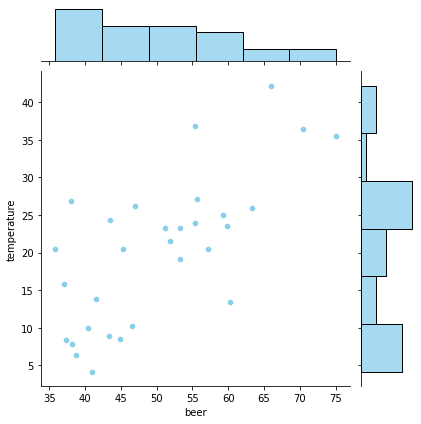

In [57]:
sns.jointplot(data=beer,x='beer',y='temperature',color='skyblue')

In [58]:
lm_model = smf.ols(formula='beer ~ temperature',data=beer).fit()

In [59]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.11e-05
Time:                        14:14:21   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 과제2
## 선형 모델을 생성하고 summary를 출력한 후 모델에 대한 통계지표들을 해석하세요
df = pd.read_csv('dataset/auto-mpg.csv')  
df_mw = df[['mpg','weight']]  
df_mw.head() 

In [124]:
df = pd.read_csv('dataset/auto-mpg.csv')  
df_mw = df[['mpg','weight']]  
df_mw.head() 

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [128]:
lm_model = smf.ols(formula='mpg ~ weight',data=df_mw).fit()


In [129]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          2.97e-103
Time:                        17:14:36   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
null_model = smf.ols('beer ~ 1',data=beer).fit()
null_model.aic

227.94194972563105

In [64]:
lm_model = smf.ols('beer ~ temperature',data=beer).fit()
lm_model.aic
# temperature가 무의미하다

208.90902935575437

In [66]:
lm_model.predict()
# 예측

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [70]:
# 기온이 0도일 때 맥주 매상의 기댓값
lm_model.predict(pd.DataFrame({'temperature' : [0]}))

0    34.610215
dtype: float64

In [72]:
lm_model.params
# 파라미터

Intercept      34.610215
temperature     0.765428
dtype: float64

In [73]:
# 온도가 20도 일때 맥주 매상의 기댓값
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.91876701095053

In [74]:
# 잔차 계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [75]:
# 잔차 = 실제값 - 예측값
y_hat = beta0 + beta1 * beer.temperature # 예측값
(beer.beer - y_hat).head() # 실제값 - 예측값

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [76]:
# 결정계수 R-squared
mu = np.mean(beer.beer) # 표본의 평균
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu) ** 2) / np.sum((y-mu) ** 2) # 전체 변화 / 모델에 의한 변화

0.5039593230611878

In [79]:
# 수정 결정계수 : 독립변수의 수가 늘어나면 결정계수가 커지는 경향을 조정하기 위해 독립변수가 늘어나는 것에 대하여 패널티 부여
n = len(beer.beer)
s = 1 # 독립변수의 수
1 - ((np.sum(resid ** 2) / (n-s-1)) / (np.sum((y-mu) ** 2) / (n-1)))

0.48624358459908534

In [81]:
lm_model.rsquared_adj

0.48624358459908534

In [82]:
# 종속변수의 변동 크기는 모델로 설명 가능한 변동과 설명 못하는 잔차제곱합으로 분해할 수 있다.

np.sum((y - mu) ** 2)

3277.1146666666655

In [83]:
np.sum((yhat - mu) ** 2) + sum(resid ** 2) # 모델이 설명 가능한 값 + 모델이 설명 불가능한 잔차 제곱

3277.114666666672

<AxesSubplot:ylabel='Density'>

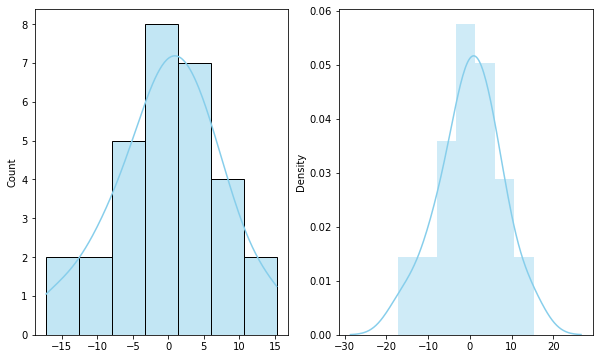

In [98]:
# 잔차 그래프
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(resid,color='skyblue',kde=True, ax=ax1)
sns.distplot(resid,color='skyblue',ax=ax2)

## 잔차와 적합도를 scatter plot으로
모델 적합도 = 모델이 잘 피팅 됐다
잔차와 상관이 없어야함

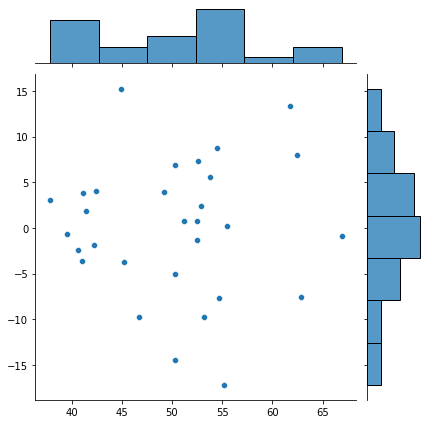

In [99]:
# 잔차의 산포도 : x축 = 적합도, y축 = 잔차
sns.jointplot(lm_model.fittedvalues,resid)

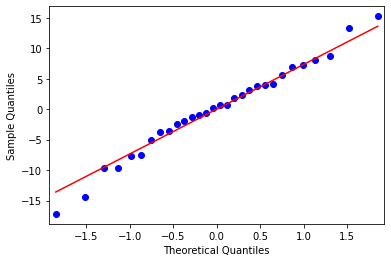

In [101]:
# Q-Q plot : 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것
fig = sm.qqplot(resid,line='s') # 정규성이 있다고 봄

### 분산분석
- 정규선형모델 중에서 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 하며 분산분석은 또한 검정방법의 이름이기도 함
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로 평균값의 차이를 거정하는 방법
- 평균갑의 차이 검정은  t검정을 이용하지만 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용
- 모집단이 정규분포를 따르는 데이터에 대해서만 적용, 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는데 활용
       
       ex)
       - "a온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?" 와 같은 과제를 분석함
       - 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다. 이중에서 다른 치료법보다 나은 치료 방법이 있는가?
       - 한 제조업체는 전구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법보다 나은가?
       - 서로 다른 두 학교의 학생들이 같은 시험을 치르려고 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?
       - 독립변수는 정성적이거나 정량적일 수 있으며 예에서 온도는 정량적이며 약은 정성적임
       - 온도가 인자라고 하면 10도, 20도, 30도와 같이 몇 개의 값을 가지며 인자를 구성하는 몇 가지 특성을 수준이라 함
       
- 각 수준은 독립적인 모집단을 구성하고 이에 따라 확률변수가 정의됨
- 분산분석은 서로 다른 수준을 갖는 모집단들을 대상으로 그들의 평균에 의미가 있는 차이가 있는지 없는지를 검정
- 인자가 하나인 분산분석을 일원분산분석, 둘이면 이원분산분석, 셋 이상이면 통틀어 다원분산분석이라고 함.
- 집단 또는 수준은 동일한 독립변수 내의 묶음을 의미한다. "씨리얼의 종류" 라는 독립변수가 있다면 코코볼, 콘푸로스트, 오레오 오즈는 그 아래의 세 수준이 될 수 있다. " 칼로리"라는 독립변수의 경우에는 가당과 무가당 두 가지 수준을 가질 수 있음.
- 일원분산분석에서는 하나의 인자의 수준만 처리가 되나 이원분산분석에서는 두 인자의 수준들이 조합되어 처리됨
- 다음의 가정에 기초가 된다

        -모든 모집단의 확률변수는 정규분포를 갖는다
        -모든 모집단의 확률변수의 분산은 sigma squared로 동일하다
        -표본은 무작위로 추출되면 모든 표본은 서로 독립적이다.

#### 검정의 다중성
- 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제를 검정의 다중성이라 함
- 검정을 반복하면 귀무가설이 기각되기 쉬워지고 1종 오류를 저지를 확률이 높아집니다
- 맑음, 비, 흐림의 세가지 수준으로 매상이 달라지는지 검정할 때 맑음 대비 비, 비 대비 흐림, 맑음 대비 흐림의 3가지 조합으로 t검정을 실시하면 검정의 다중성 문제가 발생
- 반면 분산분석을 수행하면 맑음이나 비와 같은 개별 카테고리를 보는 것이 아니라 날씨에 따라 매상이 다른지 여부를 한번의 검정으로 판단

In [103]:
# 샘플 데이터
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]
w_beer = pd.DataFrame({'beer':beer,'weather':weather})
w_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

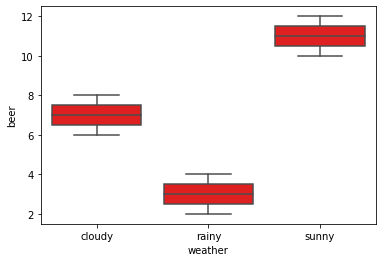

In [107]:
# boxplot
sns.boxplot(data=w_beer,x='weather',y='beer',color='red')

In [108]:
# 날씨별 매상의 평균치
w_beer.groupby('weather').mean()

,beer
weather,
cloudy,7.0
rainy,3.0
sunny,11.0


In [109]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균치
effect = [7,7,3,3,11,11]

In [110]:
# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음
mu_effect = np.mean(effect)
sq_model = np.sum((effect - mu_effect) ** 2)
sq_model
# 각 그룹의 평균을 구해서 effect로 만들고 평균을 구함 각각의 평균과의 차이를 더해주면 군간변동

64.0

In [111]:
resid = w_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [112]:
#군내변동 : 오차의 평균값 = 0
sq_resid = np.sum(resid ** 2)
sq_resid

6

In [113]:
df_model = 2 # 군간변동의 자유도(수준의 종류 수에 따라 좌우 : 수준(3) - 1)
df_resid = 3 # 군내변동의 자유도(샘플사이즈와 수준의 종류 수 : 샘플(6) - 수준(3))


In [114]:
# 군간 평균제곱(분산)
v_model = sq_model / df_model
v_model

32.0

In [115]:
# 군내 평균제곱(분산)
v_resid = sq_resid / df_resid
v_resid

2.0

In [117]:
# F비 : 군간 분산과 군내 분산의 비
f_ratio = v_model / v_resid
f_ratio

16.0

In [118]:
# p값이 0.05보다 작으므로 날씨애 의해 매상이 유의미하게 변화한다고 판단
1 - stats.f.cdf(x=f_ratio,dfn=df_model,dfd=df_resid)

0.02509457330439091

In [119]:
anova_model = smf.ols('beer ~ weather',data=w_beer).fit()

In [120]:
# 분산분석표 : 군간, 군내편차제곱합, 자유도, F비, p값
sm.stats.anova_lm(anova_model,typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [121]:
anova_model.params
# 비올 때는 -

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64